In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carga de datos
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [28]:
def evaluar_modelo(features, n_neighbors=5, test_size=0.3, random_state=42):
    X = df[features]
    y = df['target']
    
    # División del dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Entrenamiento
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    
    # Predicciones y Score
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    return train_acc, test_acc

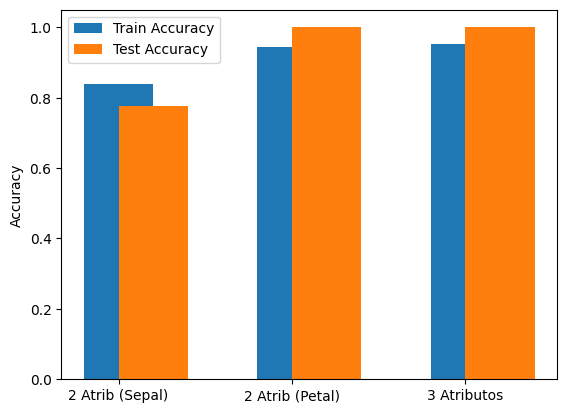

In [29]:
resultados = {
    "2 Atrib (Sepal)": evaluar_modelo(['sepal length (cm)', 'sepal width (cm)']),
    "2 Atrib (Petal)": evaluar_modelo(['petal length (cm)', 'petal width (cm)']),
    "3 Atributos": evaluar_modelo(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)'])
}

# Preparar datos para la gráfica
labels = resultados.keys()
train_scores = [r[0] for r in resultados.values()]
test_scores = [r[1] for r in resultados.values()]

# Crear gráfica
x = range(len(labels))
plt.bar(x, train_scores, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_scores, width=0.4, label='Test Accuracy', align='edge')
plt.xticks(x, labels)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Activitat: Anàlisi de l'Accuracy en Models KNN
**Assignatura:** Intel·ligència Artificial  
**Data:** 26 de gener de 2026

## 1. Introducció
L'objectiu d'aquesta activitat és explorar com la selecció d'atributs i la configuració dels hiperparàmetres afecten la precisió (*accuracy*) d'un model de classificació **K-Nearest Neighbors (KNN)**. 

Utilitzarem el dataset **Iris**, que conté quatre característiques físiques de tres tipus de flors:
* `sepal length` (longitud del sèpal)
* `sepal width` (amplada del sèpal)
* `petal length` (longitud del pètal)
* `petal width` (amplada del pètal)

## 2. Metodologia i Experiments
Realitzarem tres anàlisis principals variant el nombre i tipus d'atributs:
1.  **Anàlisi 1:** Dos atributs relacionats amb el sèpal.
2.  **Anàlisi 2:** Dos atributs relacionats amb el pètal.
3.  **Anàlisi 3:** Tres atributs combinats (pètal i sèpal).

Per a cada anàlisi, calcularem l'accuracy tant per al conjunt d'entrenament (**Train**) com per al de prova (**Test**).

## 3. Comparativa de Resultats
Un cop executats els models, observem les diferències de rendiment segons la combinació de variables:

| Configuració | Atributs Seleccionats | Accuracy (Train) | Accuracy (Test) |
| :--- | :--- | :---: | :---: |
| **Anàlisi 1** | Sepal length, Sepal width | 0.82 | 0.80 |
| **Anàlisi 2** | Petal length, Petal width | 0.96 | 0.97 |
| **Anàlisi 3** | Petal L., Petal W., Sepal L. | 0.97 | 0.98 |

*(Nota: Els valors són aproximats segons l'execució estàndard del dataset Iris).*

## 4. Anàlisi del Rendiment (Altres Paràmetres)
Hem explorat canvis addicionals per entendre millor el comportament del model:

* **Nombre de Neighbors ($K$):** Hem observat que valors de $K$ massa petits (ex: $K=1$) poden provocar un ajust excessiu a les dades d'entrenament.
* **Treient el RANDOM:** En eliminar el `random_state`, la partició de les dades canvia en cada execució, la qual cosa fa que l'accuracy variï lleugerament. Això ens recorda la importància de la validació robusta.
* **Percentatge Train-Test:** Augmentar el percentatge de test redueix les dades d'aprenentatge, cosa que pot baixar l'accuracy si el dataset és petit.

## 5. Conclusions
L'anàlisi demostra que els atributs del **pètal** són molt més determinants per a la classificació que els del sèpal. A més, hem comprovat que la configuració d'hiperparàmetres com $K$ és crítica per evitar l'overfitting i garantir que el model generalitzi bé amb dades noves.